In [101]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
df = pd.read_csv('insurance-data.csv')
print (df.shape)

(1338, 7)


In [103]:
print (df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [105]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [106]:
df['age'].mean()

39.20702541106129

C:\Users\www\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

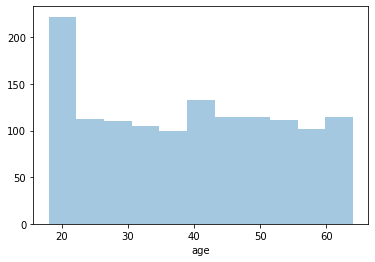

In [107]:
df['age'].dropna(inplace= True)
sns.distplot(df['age'],kde=False)

<AxesSubplot:>

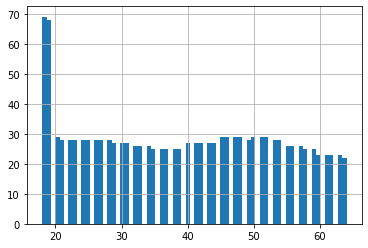

In [108]:
df['age'].hist(bins=70)

In [109]:
df.children ==0

0        True
1       False
2       False
3        True
4        True
        ...  
1333    False
1334     True
1335     True
1336     True
1337     True
Name: children, Length: 1338, dtype: bool

In [110]:
df.smoker == 'yes'

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Name: smoker, Length: 1338, dtype: bool

In [111]:
df.smoker == 'no'

0       False
1        True
2        True
3        True
4        True
        ...  
1333     True
1334     True
1335     True
1336     True
1337    False
Name: smoker, Length: 1338, dtype: bool

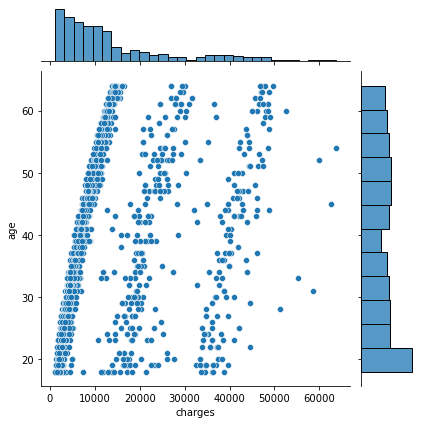

In [112]:
sns.jointplot(x='charges',y='age',data=df,kind='scatter')

C:\Users\www\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

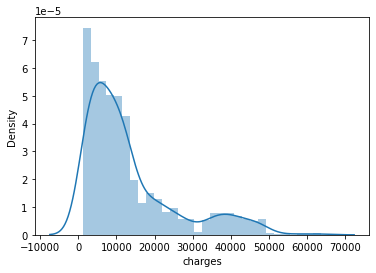

In [113]:
sns.distplot(df['charges'])

<AxesSubplot:>

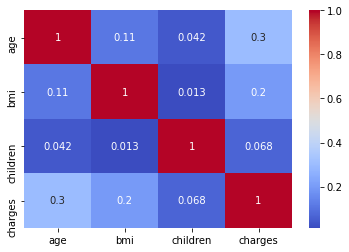

In [114]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [115]:
df['bmi'].mean()

30.663396860986538

<AxesSubplot:xlabel='sex', ylabel='bmi'>

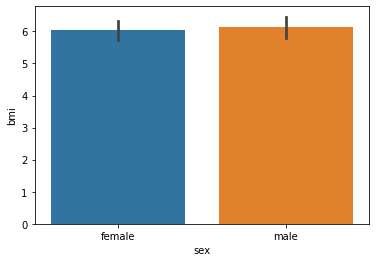

In [116]:
sns.barplot(x= 'sex',y='bmi',data=df,estimator=np.std)

<AxesSubplot:xlabel='sex', ylabel='age'>

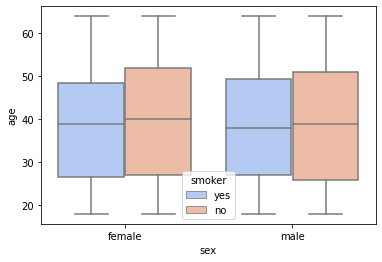

In [117]:
sns.boxplot(x='sex',y="age",hue="smoker",data=df,palette="coolwarm")

In [119]:
dataset = pd.read_csv('insurance-data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

X

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/6, random_state = 0)

X_train

array([[25, 'female', 23.465, 0, 'no', 'northeast'],
       [58, 'female', 33.1, 0, 'no', 'southwest'],
       [64, 'male', 37.905, 0, 'no', 'northwest'],
       ...,
       [40, 'male', 25.08, 0, 'no', 'southeast'],
       [19, 'male', 35.53, 0, 'no', 'northwest'],
       [33, 'female', 18.5, 1, 'no', 'southwest']], dtype=object)

In [133]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


ValueError: could not convert string to float: 'female'

In [127]:
y_pred = regressor.predict(X_test)
y_pred

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [126]:
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_pred,y_test))
print("MAE:",metrics.mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("r2_score:",metrics.r2_score(y_pred,y_test))

NameError: name 'y_pred' is not defined